# Latent Matrix Factorization

Matrix Factorization is a very commonly used technique in data compression, dimension reduction, clustering, and feature learning. Given a matrix $A \in \mathbb{R}^{m \times n}$, our task is to find a low rank approximation to $A$. The most popular formation is
$$
\min _{H \in \mathbb{R}^{m \times k}, W \in \mathbb{R}^{n \times k}} f(H, W):=\frac{1}{2}\left\|A-H W^{T}\right\|_{F}^{2} .
$$
If $A$ is the data matrix (each column is a data sample), then $H$ is usually explained as the pattern matrix and $W$ is the coefficient matrix. This problem in (1) is not convex but its global optimal solution can be obtained.

***








### Reading

Page 93 - 100, [the textbook, Recommender Systems](https://link-springer-com.eproxy.lib.hku.hk/book/10.1007%2F978-3-319-29659-3)

For the detail of GD, and SGD, please see Figure 3.8 and Figure 3.9 for detail of the [textbook, Recommender Systems](https://link-springer-com.eproxy.lib.hku.hk/book/10.1007%2F978-3-319-29659-3)

### Comparing Gradient Descent(GD), Stochastic Gradient Descent(SGD) of Matrix Factorization and Alternating Least Squares for a matrix factorization problem:

### Summary and comparation of 3 optimization methods: Gradient Descent, Stochastic Gradient Descent, Alternating Least Square.



**Gradient Descent** is an optimization method used to minimize a given function by iteratively updating the model parameters in  the steepest decrease(i.e. the negative gradient of the loss function) direction. The update equation is:

θ = θ - α * ∇f(θ)

The parameter value θ represents the feature matrix, α is the learning rate, and ∇f(θ) is the gradient of the function f at the current parameter values.

> GD method can be computationally expensive for large datasets as it requires computing the gradient to all parameters at each iteration.


**Stochastic Gradient Descent** updates the model parameters based on gradient computed for a random selected data point at each iteration instead of the entire dataset.

> SGD method is faster and more suitable for large datasets, but it can be noisier and less stable than GD.



**Alternating Least Squares** involves iteratively solving two least-squares problems alternately by fixing one set of variables (e.g., user factors) and optimizing the other set (e.g., item factors) until convergence.

we update U and VT alternatively using the following equations:

$U = (VT^T VT + λ I)^{-1} VT^T  A$

$VT = (U^T U + λ I)^{-1} U^T A^T$

where λ is the regularization parameter, I is the identity matrix, ^T is the transpose.

> ALS method is specifically designed for matrix factorization problems and computationally efficient  and can handle large datasets, Since matrix factorized to least squares subproblems, they can be solved efficiently. Making it is suitable for collaborative filtering in recommender systems, like predict missing values in matrix of user-item ratings.


### *Some methods to deal with missing data during optimization.*


1. *Imputation*: Filling zero may exist bias or an estimate predicted by observed value is advisable, such as the mean or median of the observed values. Imputed values can be updated during optimization as more information becomes available, such as directly modifying the gradient calculation to only include the observed data in gradient-based optimization algorithms.
For ALS method, we fixing one set of variables (e.g., user factors) and optimizing the other set (e.g., item factors) until convergence. And then, predict the entry of the resulting matrix as missing ratings by taking the dot product of the corresponding user and item factors.

2. *Weighting*: Use a weighted loss function that down-weights the contribution of the missing data. Assign lower weights to the missing data points in the loss function. This allows the model to focus more on the observed data.

3. *Masking*: Use a mask to indicate which data points are missing and modify the loss function to ignore the missing values during optimization.


## Coding

We use the modified objective function, which works with incomplete matrics, is computed only over the observed entries as following (on Page 97 of the textbook):

$$\text{Minimize } J = \frac{1}{2} \sum_{(i, j)\in S} e^2_{ij} = \frac{1}{2}\sum_{(i, j)\in S} \left(r_{ij} - \sum_{q=1}^k u_{iq}v_{jq} \right)^2  $$

Subject to: No constraints on U and V

### Details of input argument and return values.

Parameters:

		A: ndarray
			- m by n matrix to factorize

        opt_method: str
            -'SGD', 'GD', 'ALS',
        
        learn_rt: float
            - the learning rate for SGD or GD optimization method.

        k: int
			- integer specifying the column length of W / the row length of H
			- the resulting matrices W, H will have sizes of m by k and k by n, respectively

		num_iter: int
			- number of iterations for the multiplicative updates algorithm
		print_enabled: boolean
			- if ture, output print statements

	Returns:
		U: ndarray user-feature matrix
			- m by k matrix where k = dim
		VT: ndarray feature-item matrix
			- k by n matrix where k = dim


>The skeleton of class ```MatrixFactor``` :

In [44]:
import numpy as np
import pandas as pd
class MatrixFactor:
    def __init__(self, k, opt_method = 'SGD', learn_rt = 0.005, num_iter=1000, print_enabled=True):

        self.opt_method = opt_method
        self.learn_rt = learn_rt
        self.num_iter = num_iter
        self.k = k
        self.print_enabled = print_enabled

    def _Squared_Frobenius_Loss(self):
        """
        return
        1. n*m np.ndarray: the difference between A and estimated value at each entry of A;
        2. total loss, the sum of errors for all entries of A.
        """
        A_est = np.matmul(self.U, self.VT)
        diff_error = np.subtract(self.A, A_est)
        diff_error[self.nan_cell_mask] = 0
        sq_error = np.square(diff_error)
        sq_error_sum = 0.5 * sq_error.sum() # the ignore missing data

        return diff_error, sq_error_sum

    def _SGD(self):
        """_SGD, should
        1. update self.U, self.VT and
        2. return a 1D np.ndarray which stores the loss after each iteration,
        the length of the list should be the number of iteration,
        because we include the loss before optimization, i.e. the loss when num_iter = 0
        One iteration is finished only as all entries in U and V are updated.
          """
        pass


    def _GD(self):
        """
        Functionality is same as the _SGD method.
        """
        pass

    def _ALS(self):
        """
        Functionality is same as the _SGD method.
        """
        pass

    def fit(self, A, init_U = None, init_VT = None):
        ## initialize U, V
        self.A = A.copy()
        self.nan_cell_mask = np.where(np.isnan(self.A))

        # calculate row mean, if all entries in one row is nan, use population mean.
        self.A[np.all(np.isnan(self.A), axis=1)] = np.nanmean(self.A)
        self.rowmean = np.nanmean(self.A, axis = 1)
        #Place row means in the indices. Align the arrays using take
        #self.A[self.nan_cell_mask] = np.take(self.rowmean, self.nan_cell_mask[0])

        self.A[self.nan_cell_mask] = -1  # empty entries are filled with arbitrary numbers for matrix calculation.

        if init_U is None:
            self.U = np.random.rand(np.size(self.A, 0), self.k)
        else:
            self.U = init_U
        if init_VT is None:
            self.VT = np.random.rand(self.k, np.size(self.A, 1))
        else:
            self.VT = init_VT

        """for optimization"""
        if self.opt_method == "SGD":
            loss_list = self._SGD()
        elif self.opt_method == "GD":
            loss_list = self._GD()
        elif self.opt_method == 'ALS':
            loss_list = self._ALS()
        elif self.opt_method == 'ALS_non_negative':
            loss_list = self._ALS_non_negative()
        else:
            raise NotImplementedError("Cannot use provided optimization method!!!")
        return self.U, self.VT, loss_list



For Gradient Descent:

In [45]:
def _GD(self):
    loss_list = np.array([])
    for n in range(self.num_iter):
        # calcualte the squared Frobenius norm
        diff, tol_error = self._Squared_Frobenius_Loss()
        # calculate the gradient for each entry of U
        grad_U = -np.matmul(diff, np.transpose(self.VT))
        # calculate the gradient for each entry of VT
        grad_VT = -np.matmul(np.transpose(self.U), diff)

        # update U and VT
        self.U =  np.subtract(self.U, self.learn_rt*grad_U)
        self.VT = np.subtract(self.VT, self.learn_rt*grad_VT)
        # print total loss if needed
        if self.print_enabled:
            print("iteration " + str(n) + ": " + str(tol_error))
        loss_list = np.append(loss_list, tol_error)
    return loss_list

MatrixFactor._GD = _GD


> One iteration is finished only as all entries in U and V are updated.

In [46]:
def _SGD(self):
    """
    1. update self.U, self.VT and
    2. return a 1D np.ndarray which stores the loss after each iteration,
    the length of the list should be the number of iteration,
    because we include the loss before optimization, i.e. the loss when num_iter = 0
    One iteration is finished only as all entries in U and V are updated.
      """
    loss_list = np.array([])

    for n in range(self.num_iter):
        # calcualte the squared Frobenius norm
        diff, tol_error = self._Squared_Frobenius_Loss()
        # Shuffle the non-missing indices of known entries in
        non_nan_idxs = np.argwhere(~np.isnan(self.A))
        np.random.shuffle(non_nan_idxs)

        for row, col in non_nan_idxs:

            # Calculate the error for the current entry
            stodiff_error = self.A[row, col] - (self.U[row, :] @ self.VT[:, col])

            # Calculate the gradient for the current entry of U and VT
            grad_U_row = stodiff_error * self.VT[:, col]
            grad_VT_col = stodiff_error * self.U[row, :]

            # Update U and VT
            self.U[row, :] += self.learn_rt * grad_U_row
            self.VT[:, col] += self.learn_rt * grad_VT_col

        # Calculate the squared Frobenius norm
        diff, tol_error = self._Squared_Frobenius_Loss()
        # Print total loss if needed
        if self.print_enabled:
            print("iteration " + str(n) + ": " + str(tol_error))
        loss_list = np.append(loss_list, tol_error)

    return loss_list

MatrixFactor._SGD = _SGD


In [47]:
def _ALS(self):

    loss_list = np.array([])

    A_man = self.A
    #Place row means in the indices. Align the arrays using take
    A_man[self.nan_cell_mask] = np.take(self.rowmean, self.nan_cell_mask[0])

    # Decompose the input matrix
    for n in range(self.num_iter):

        # Update VT
        self.VT = np.linalg.lstsq(self.U, A_man, rcond = -1)[0]

        # Update U
        self.U = np.linalg.lstsq(self.VT.T, A_man.T, rcond = -1)[0].T

        # update the missing values in A_wonan
        A_est =  np.matmul(self.U,self.VT)
        A_man[self.nan_cell_mask] = A_est[self.nan_cell_mask]

        # calculate loss to monitor the process,
        # although optimization of ALS does not need frobenious loss
        _, tol_error = self._Squared_Frobenius_Loss()
        # Print total loss if needed
        if self.print_enabled:
            print("iteration " + str(n) + ": " + str(tol_error))
        loss_list = np.append(loss_list, tol_error)
    return loss_list

MatrixFactor._ALS = _ALS


#### //ALS Trial

In [ ]:
def _ALS(self):

    loss_list = np.array([])

    A_man = self.A
    #Place row means in the indices. Align the arrays using take
    A_man[self.nan_cell_mask] = np.take(self.rowmean, self.nan_cell_mask[0])

    # Decompose the input matrix
    for n in range(self.num_iter):

        # Update U while keeping VT fixed by solving the least squares subproblems for each row
        for i in range(self.U.shape[0]):
            A_i = self.A[i, :]
            VT_i = self.VT[:, A_i != -1]
            U_i = self.U[i, :]
            U_i_hat = np.linalg.solve((VT_i@ VT_i.T) + self.learn_rt * np.eye(self.k), (VT_i@ A_i[A_i != -1].T))  # U = (VT^T . VT + λ I)^-1 . VT^T . A
            self.U[i, :] = U_i_hat

        # Update VT while keeping U fixed by solving the least squares subproblems for each column
        for j in range(self.VT.shape[1]):
            A_j = self.A[:, j]
            U_j = self.U[A_j != -1, :]
            VT_j = self.VT[:, j]
            VT_j_hat = np.linalg.solve((U_j.T@ U_j) + self.learn_rt * np.eye(self.k), (U_j.T@ A_j[A_j != -1])) # VT = (U^T . U + λ I)^-1 . U^T . A^T
            self.VT[:, j] = VT_j_hat

        # update the missing values in A_man
        A_est =  np.matmul(self.U,self.VT)
        A_man[self.nan_cell_mask] = A_est[self.nan_cell_mask]

        # calculate loss to monitor the process,
        # although optimization of ALS does not need frobenious loss
        _, tol_error = self._Squared_Frobenius_Loss()
        # Print total loss if needed
        if self.print_enabled:
            print("iteration " + str(n) + ": " + str(tol_error))
        loss_list = np.append(loss_list, tol_error)
    return loss_list

MatrixFactor._ALS = _ALS

> In this method, we first initialize an empty array to store the loss at each iteration. Then, for each iteration, we update the U matrix while keeping V fixed, and then we update the V matrix while keeping U fixed. To update the U matrix, we loop over each row of U and solve a linear system of equations using the non-missing entries of the corresponding row in A and the corresponding columns of V. To update the V matrix, we loop over each column of VT and solve a linear system of equations using the non-missing entries of the corresponding column in A and the corresponding rows of U. After each iteration, we calculate the total loss and append it to the loss list. Finally, we return the loss list.

## 1. Toy example
Setting the number of latent factor (k)  as 2

In [60]:
d = {'item0': [np.nan, 7, 6, 1, 1,5],
     'item1': [3, 6, 7, 2, np.nan, 4],
      'item2': [3, 7, np.nan, 2, 1,5],
     'item3': [1, 4, 4, 3, 2, 3],
      'item4': [1, 5, 3, 3, 3, 4],
     'item5': [np.nan, 4, 4, 4, 3, 2]}
df = pd.DataFrame(data=d).astype('float32')
X = np.array(df)
#
import time
t0=time.time()
MF_GD = MatrixFactor(k = 2, opt_method = 'GD', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_GD, VT_GD, loss_hist_GD = MF_GD.fit(X)
t1=time.time()

MF_SGD = MatrixFactor(k = 2, opt_method = 'SGD', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_SGD, VT_SGD, loss_hist_SGD = MF_SGD.fit(X)
t2=time.time()

MF_ALS = MatrixFactor(k = 2, opt_method = 'ALS', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_ALS, VT_ALS, loss_hist_ALS = MF_ALS.fit(X)
t3=time.time()

In [61]:
print('%-20s%-25s%-25s%-25s' % (" ","GD","SGD","ALS"))
print('%-20s%-25s%-25s%-25s' % ("fianl loss",loss_hist_GD[-1],loss_hist_SGD[-1],loss_hist_ALS[-1]))
print('%-20s%-25s%-25s%-25s' % ("training time(s)",t1-t0,t2-t1,t3-t2))
print("------------------------------------------------------")
print(U_GD, "\nuser-feature matrix using GD")
print(np.transpose(VT_GD), "\nitem-feature matrix using GD")
print("------------------------------------------------------")
print(U_SGD, "\nuser-feature matrix using SGD")
print(np.transpose(VT_SGD), "\nitem-feature matrix using SGD")
print("------------------------------------------------------")
print(U_ALS, "\nuser-feature matrix using ALS")
print(np.transpose(VT_ALS), "\nitem-feature matrix using ALS")
print("------------------------------------------------------")

                    GD                       SGD                      ALS                      
fianl loss          2.6256662119599823       13.84739317273369        2.6140831012229047       
training time(s)    0.009350776672363281     0.16231155395507812      0.018092632293701172     
------------------------------------------------------
[[ 1.38856868  0.01058046]
 [ 2.30948957  1.67690878]
 [ 2.30131726  1.40405896]
 [-0.0872176   1.93253047]
 [-0.14649338  1.54776727]
 [ 1.69837033  1.07139921]] 
user-feature matrix using GD
[[2.36849    0.72622706]
 [2.01778881 1.08394912]
 [2.25593683 1.04404533]
 [0.74898365 1.49614721]
 [0.70594864 1.76200478]
 [0.27423774 2.03223733]] 
item-feature matrix using GD
------------------------------------------------------
[[ 1.12537559  0.04608317]
 [ 2.02310499  2.33152282]
 [-0.88346953  2.83857044]
 [ 0.48298126  1.16146915]
 [ 0.30107435  0.64653752]
 [ 1.54356572  1.5612741 ]] 
user-feature matrix using SGD
[[ 0.44427125  2.30177254]
 [ 0.46

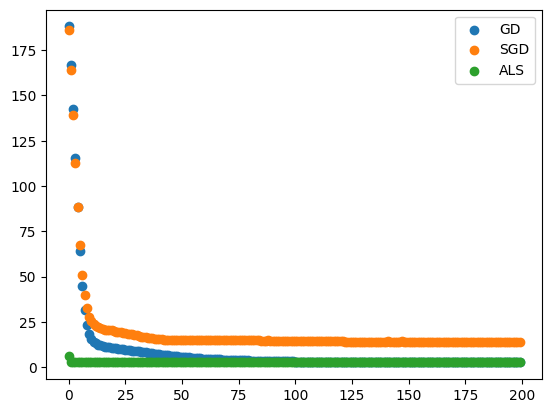

In [62]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_GD)), loss_hist_GD, label='GD' )
plt.scatter(range(len(loss_hist_SGD)), loss_hist_SGD, label='SGD' )
plt.scatter(range(len(loss_hist_ALS)), loss_hist_ALS, label='ALS' )
plt.legend()

## Example 2

We will use the dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service.
 https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset?select=ratings.csv


We only consider the first 100 users (user-id from 0-99), and the first 80 movies.

The latent factor for all methods is set as 24.







In [50]:
dataset = pd.read_csv('ratings.csv')
dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [51]:
A = dataset.pivot(index="userId", columns='movieId', values='rating')

In [52]:
A_small = np.array(A)[:100, :80]

In [53]:
A_small

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [4.5, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, 3.5, ..., nan, nan, nan]])

In [54]:
import time
t0=time.time()
MF_GD = MatrixFactor(k = 24, opt_method = 'GD', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_GD, VT_GD, loss_hist_GD = MF_GD.fit(A_small)
t1=time.time()

MF_SGD = MatrixFactor(k = 24, opt_method = 'SGD', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_SGD, VT_SGD, loss_hist_SGD = MF_SGD.fit(A_small)
t2=time.time()

MF_ALS = MatrixFactor(k = 24, opt_method = 'ALS', learn_rt = 0.01, num_iter=200, print_enabled=False)
U_ALS, VT_ALS, loss_hist_ALS = MF_ALS.fit(A_small)
t3=time.time()

                    GD                       SGD                      ALS                      
fianl loss          0.013786689501556287     192.3439525637625        5.6400915905415726e-14   
training time(s)    0.07639050483703613      30.520472764968872       0.33376288414001465      


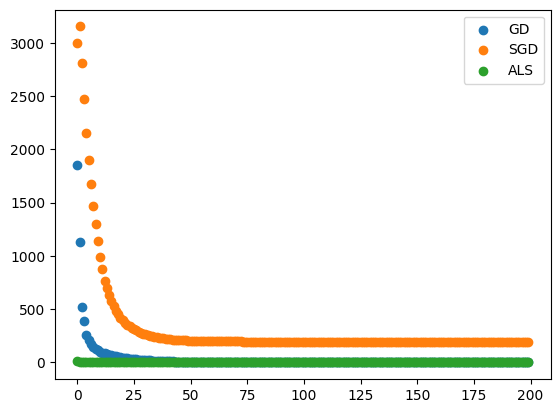

In [55]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_GD)), loss_hist_GD, label='GD' )
plt.scatter(range(len(loss_hist_SGD)), loss_hist_SGD, label='SGD' )
plt.scatter(range(len(loss_hist_ALS)), loss_hist_ALS, label='ALS' )
plt.legend()

print('%-20s%-25s%-25s%-25s' % (" ","GD","SGD","ALS"))
print('%-20s%-25s%-25s%-25s' % ("fianl loss",loss_hist_GD[-1],loss_hist_SGD[-1],loss_hist_ALS[-1]))
print('%-20s%-25s%-25s%-25s' % ("training time(s)",t1-t0,t2-t1,t3-t2))

Return 10 recommendations for user 5 [user-id = 5] based on the predicted ratings of matrix factorization using three optimization methods in sorted descending order. [from Highest]

In [56]:
nan_cell_mask = np.where(np.isnan(A_small))

A_GD=A_small.copy()
A_GD[nan_cell_mask]=np.matmul(U_GD,VT_GD)[nan_cell_mask]
GD_top10=np.argsort(-A_GD[4])[:10]
print("Top 10 movies IDs by GD:" ,GD_top10)

A_SGD=A_small.copy()
A_SGD[nan_cell_mask]=np.matmul(U_SGD,VT_SGD)[nan_cell_mask]
SGD_top10=np.argsort(-A_SGD[4])[:10]
print("Top 10 movies IDs by SGD:", SGD_top10)

A_ALS=A_small.copy()
A_ALS[nan_cell_mask]=np.matmul(U_ALS,VT_ALS)[nan_cell_mask]
ALS_top10=np.argsort(-A_ALS[4])[:10]
print("Top 10 movies IDs by ALS:", ALS_top10)

Top 10 movies IDs by GD: [36 69 65 34 74 45 63 48 67 72]
Top 10 movies IDs by SGD: [52  0 46 33 32 20 35 27 21 39]
Top 10 movies IDs by ALS: [52  1 53 16 10 25 66 44 21 70]


In [57]:
print("------------------------------------------------------")
print(U_GD, "\nuser-feature matrix using GD")
print(np.transpose(VT_GD), "\nitem-feature matrix using GD")
print("------------------------------------------------------")
print(U_SGD, "\nuser-feature matrix using SGD")
print(np.transpose(VT_SGD), "\nitem-feature matrix using SGD")
print("------------------------------------------------------")
print(U_ALS, "\nuser-feature matrix using ALS")
print(np.transpose(VT_ALS), "\nitem-feature matrix using ALS")
print("------------------------------------------------------")

------------------------------------------------------
[[ 0.23449476  0.19342377  0.92703537 ...  0.5799136   0.58964179
  -0.04042095]
 [ 0.83844111  0.3492219   0.61738878 ...  0.25964831  0.25824742
   0.59783855]
 [ 0.46636036  0.13380509  0.14466436 ...  0.15696261  0.48975944
   0.01534014]
 ...
 [ 0.93942063  0.74494518  0.16634643 ...  0.71664221  0.69508126
   0.8880983 ]
 [ 0.90585667  0.2871131   0.41538768 ...  0.42261992  0.25512865
   0.69239771]
 [ 0.59660441  0.26760364  0.67658048 ...  0.16894444  0.10090306
   0.50404212]] 
user-feature matrix using GD
[[ 1.4066274   0.41747919  0.32400988 ...  0.39213062  0.50541037
   0.05532949]
 [-0.04189961  0.87073297  0.30096955 ...  0.5958903   0.58823132
   0.82873113]
 [-0.03344033  0.07869882  0.06081278 ...  0.67928208  0.63690166
   0.28996086]
 ...
 [ 0.73648266  0.04451504  0.06983212 ...  1.10974217  0.70896508
   0.38283769]
 [-0.15013125  0.39479987  0.12162536 ...  0.67874946  0.09734643
   0.62176756]
 [ 0.64579173

## Trial

#### Trial - Toy example

In [ ]:
print(U_GD, "\nuser-feature matrix using GD")
print(np.transpose(U_GD), "\nitem-feature matrix using GD")

[[0.97267549 0.66954144]
 [1.43686049 2.61611991]
 [1.7336567  2.03678462]
 [0.63185199 1.08930639]
 [1.03173118 0.53101346]
 [1.24443461 1.68647277]] 
user-feature matrix using GD
[[0.97267549 1.43686049 1.7336567  0.63185199 1.03173118 1.24443461]
 [0.66954144 2.61611991 2.03678462 1.08930639 0.53101346 1.68647277]] 
item-feature matrix using GD


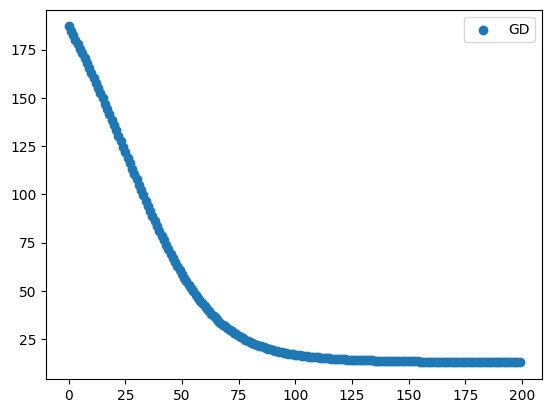

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_GD)), loss_hist_GD, label='GD' )
plt.legend()

In [ ]:
print(U_GD, "\nuser-feature matrix using GD")
print(np.transpose(U_GD), "\nitem-feature matrix using GD")

[[0.77515207 0.83741138]
 [2.22662111 1.79293208]
 [2.14065648 1.40889607]
 [0.79869873 0.96825046]
 [0.77106625 0.65064079]
 [1.66349009 1.13093362]] 
user-feature matrix using GD
[[0.77515207 2.22662111 2.14065648 0.79869873 0.77106625 1.66349009]
 [0.83741138 1.79293208 1.40889607 0.96825046 0.65064079 1.13093362]] 
item-feature matrix using GD


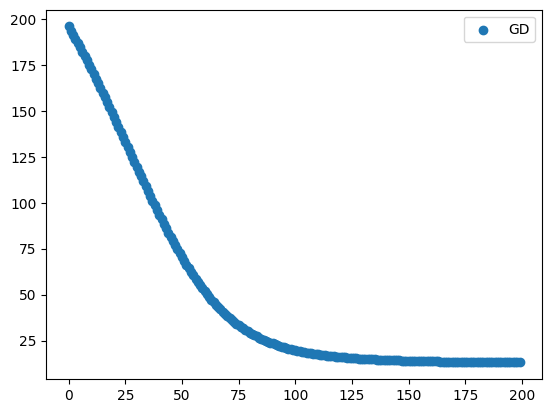

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_GD)), loss_hist_GD, label='GD' )
plt.legend()

Filling missing data with Row-mean

In [ ]:
MF_GD.A, np.isnan(X), np.argwhere(np.isnan(X)) ,MF_GD.nan_cell_mask, MF_GD.A[MF_GD.nan_cell_mask]

(array([[-1.,  3.,  3.,  1.,  1., -1.],
        [ 7.,  6.,  7.,  4.,  5.,  4.],
        [ 6.,  7., -1.,  4.,  3.,  4.],
        [ 1.,  2.,  2.,  3.,  3.,  4.],
        [ 1., -1.,  1.,  2.,  3.,  3.],
        [ 5.,  4.,  5.,  3.,  4.,  2.]], dtype=float32),
 array([[ True, False, False, False, False,  True],
        [False, False, False, False, False, False],
        [False, False,  True, False, False, False],
        [False, False, False, False, False, False],
        [False,  True, False, False, False, False],
        [False, False, False, False, False, False]]),
 array([[0, 0],
        [0, 5],
        [2, 2],
        [4, 1]]),
 (array([0, 0, 2, 4]), array([0, 5, 2, 1])),
 array([-1., -1., -1., -1.], dtype=float32))

In [ ]:
MF_GD.rowmean = np.nanmean(X, axis = 1)
MF_GD.A[MF_GD.nan_cell_mask] = np.take(MF_GD.rowmean,  MF_GD.nan_cell_mask[0])
MF_GD.rowmean,  MF_GD.nan_cell_mask[0], MF_GD.A[MF_GD.nan_cell_mask]

(array([2.       , 5.5      , 4.8      , 2.5      , 2.       , 3.8333333],
       dtype=float32),
 array([0, 0, 2, 4]),
 array([2. , 2. , 4.8, 2. ], dtype=float32))

In [ ]:
MF_SGD = MatrixFactor(k = 24, opt_method = 'SGD', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_SGD, VT_SGD, loss_hist_SGD = MF_SGD. fit(X)


print(U_SGD, "\nuser-feature matrix using SGD\n")
print(np.transpose(U_SGD), "\nitem-feature matrix using SGD")

rating_5 = U_SGD[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])

[[ 0.16123891  0.58129648 -0.07220649  0.25845018  0.1894076   0.80830378
   0.47498642  0.51786603 -0.60976542  0.70628357 -0.03989224  0.9850419
  -0.13938614 -0.10238886  0.02648979  0.05837939  0.42715415 -0.11032365
  -0.17141834  0.25772964 -0.29230053 -0.43083476 -0.38444314  0.87276522]
 [ 0.79526204  0.56043927  0.31013442  0.86156771  0.51380028  0.66858404
  -0.04433432  0.83085173  0.44393474  0.79332168  0.11049882  0.48247854
   0.79601522  0.33421193  0.88797775  1.35677928  0.74815072  0.33493629
   0.40412028  1.03352087  0.39467292  0.13044081  1.05876253  0.96628588]
 [ 0.88221527  0.50827916  0.28708607 -0.0435314   0.06778759  0.57008058
   0.97904535 -0.3873374   0.92166252 -0.12984927  0.58647161  0.79032952
   0.54743032  0.62885028  1.03844944  0.25850203  1.22647853  1.56775297
  -0.44477048  0.75970329  0.16641422  1.02574797  0.25902394  0.66621554]
 [ 0.57661076  0.58345206  0.85884208  0.56945527  0.72667233  0.22109636
   0.15215199  0.09122254  0.6357981

Text(0.5, 1.0, 'SGD')

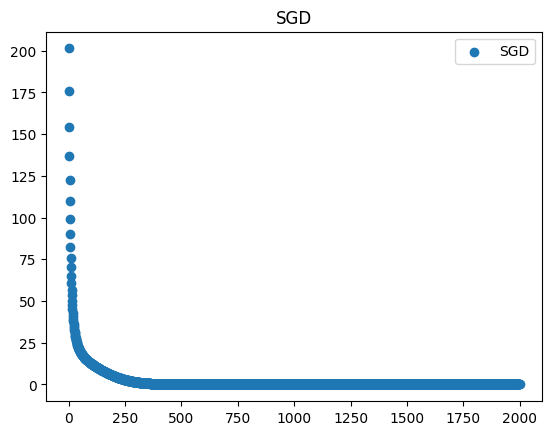

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_SGD)), loss_hist_SGD, label= 'SGD' )
plt.legend()
plt.title("SGD")

In [ ]:
MF_ALS = MatrixFactor(k = 24, opt_method = 'ALS', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_ALS, VT_ALS, loss_hist_ALS = MF_ALS. fit(X)


print(U_ALS, "\nuser-feature matrix using ALS\n")
print(np.transpose(U_ALS), "\nitem-feature matrix using ALS")

rating_5 = U_ALS[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])

[[-0.38308489  0.30757827  0.3074894  -0.00329532 -0.12846136 -0.08631214
   0.19096284  0.02953287 -0.00345548  0.40747441  0.29181235  0.13288202
   0.40632123  0.20148738  0.06294159 -0.08382746  0.16785968  0.63670441
   0.11822933  0.0606241   0.33670171  0.64907754  0.30556151  0.067577  ]
 [ 0.05785712  0.96650573  0.34674643  0.46787016 -0.25312359 -0.23961243
   0.72640539  0.47904342  0.80064009  0.70979241  0.59654276  0.41685819
   0.78177977  0.6680298   0.20245278  0.41242653 -0.00234212  0.95590048
   0.25136286  0.360946    0.58971532  1.02765465  0.84072959  0.38993391]
 [-0.34651541  0.71457824  0.69288472  0.46500032  0.21217382  0.37878046
   0.85595411  0.36960602  0.45815089  0.50421693  0.77170434  0.51450394
   1.13378125  0.3277602   0.20448308 -0.24583883  0.48794058  0.72922673
   0.31170279  0.56568694  0.49388156  1.21952275  0.45651024  0.16608025]
 [ 0.68936475 -0.05834098  0.30176947  0.19172664  0.136499    0.4795275
   0.41821768  0.60820622  0.4590827

Text(0.5, 1.0, 'ALS')

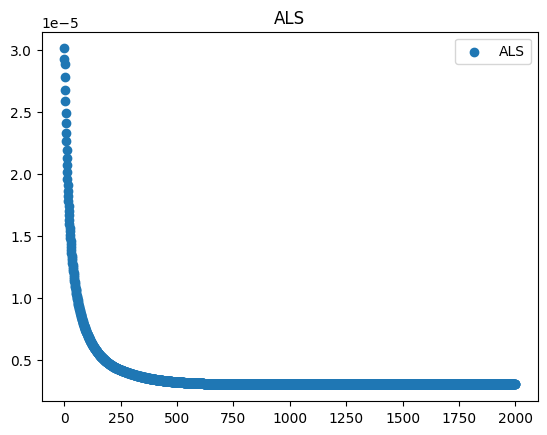

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_ALS)), loss_hist_ALS, label= 'ALS' )
plt.legend()
plt.title("ALS")

#### Trial - Movie rating

In [ ]:
MF_GD = MatrixFactor(k = 24, opt_method = 'GD', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_GD, VT_GD, loss_hist_GD = MF_GD.fit(A_small)

print(U_GD, "\nuser-feature matrix using GD\n")
print(np.transpose(U_GD), "\nitem-feature matrix using GD")

rating_5 = U_GD[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])


[[ 0.4886004   0.30412488  0.7129442  ...  0.4180742   0.23191238
   0.79519647]
 [ 0.13267682  0.78716149  0.2544546  ...  0.20367084  0.16425437
   0.39564623]
 [ 0.90987729  0.20973371 -0.13836435 ... -0.35292902  0.61568132
   0.77566679]
 ...
 [ 0.42866372  0.7718549   0.03054996 ...  0.2311335   0.8473437
   0.52235777]
 [ 0.53135297  0.42976308  0.30483557 ...  0.20482876  0.69541844
   0.18982385]
 [ 0.71449652  0.75690982  0.3054388  ...  0.61026599  0.41272001
   0.24802207]] 
user-feature matrix using GD

[[ 0.4886004   0.13267682  0.90987729 ...  0.42866372  0.53135297
   0.71449652]
 [ 0.30412488  0.78716149  0.20973371 ...  0.7718549   0.42976308
   0.75690982]
 [ 0.7129442   0.2544546  -0.13836435 ...  0.03054996  0.30483557
   0.3054388 ]
 ...
 [ 0.4180742   0.20367084 -0.35292902 ...  0.2311335   0.20482876
   0.61026599]
 [ 0.23191238  0.16425437  0.61568132 ...  0.8473437   0.69541844
   0.41272001]
 [ 0.79519647  0.39564623  0.77566679 ...  0.52235777  0.18982385
  

Text(0.5, 1.0, 'GD')

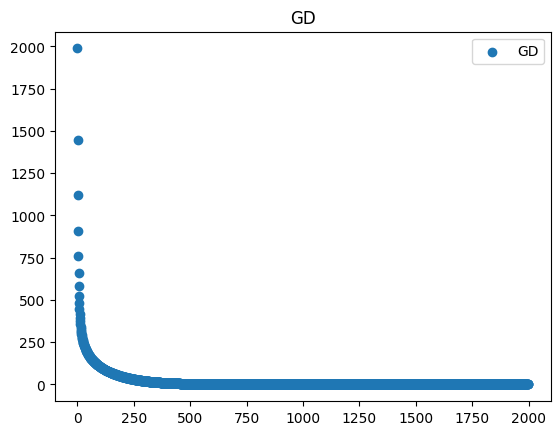

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_GD)), loss_hist_GD, label='GD' )
plt.legend()
plt.title("GD")

In [ ]:
MF_SGD = MatrixFactor(k = 24, opt_method = 'SGD', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_SGD, VT_SGD, loss_hist_SGD = MF_SGD. fit(A_small)


print(U_SGD, "\nuser-feature matrix using SGD\n")
print(np.transpose(U_SGD), "\nitem-feature matrix using SGD")

rating_5 = U_SGD[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])

[[-0.02468465  0.47502669  0.59148526 ...  0.46441319  0.53138073
   1.3018989 ]
 [ 0.37274123 -0.19947795  0.26631285 ...  0.12745382  0.32727483
  -0.00241364]
 [ 0.35581706 -0.21589494  0.3062081  ...  0.08042524  0.30124983
   0.03507002]
 ...
 [ 0.66422929 -0.4219532   0.19831051 ...  0.28861438  0.45461137
   0.07233581]
 [ 0.0813407  -0.55167185  0.52762788 ... -0.20657143  0.19001077
   0.40366718]
 [ 0.50444369  0.83593261  0.43436925 ...  1.01789374  0.52495816
  -0.65874442]] 
user-feature matrix using SGD

[[-0.02468465  0.37274123  0.35581706 ...  0.66422929  0.0813407
   0.50444369]
 [ 0.47502669 -0.19947795 -0.21589494 ... -0.4219532  -0.55167185
   0.83593261]
 [ 0.59148526  0.26631285  0.3062081  ...  0.19831051  0.52762788
   0.43436925]
 ...
 [ 0.46441319  0.12745382  0.08042524 ...  0.28861438 -0.20657143
   1.01789374]
 [ 0.53138073  0.32727483  0.30124983 ...  0.45461137  0.19001077
   0.52495816]
 [ 1.3018989  -0.00241364  0.03507002 ...  0.07233581  0.40366718
 

In [ ]:
MF_SGD = MatrixFactor(k = 24, opt_method = 'SGD', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_SGD, VT_SGD, loss_hist_SGD = MF_SGD. fit(A_small)


print(U_SGD, "\nuser-feature matrix using SGD\n")
print(np.transpose(U_SGD), "\nitem-feature matrix using SGD")

rating_5 = U_SGD[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])

[[-0.038931    0.85070014  0.01287731 ...  0.03901019  0.1177622
   0.26960974]
 [ 0.21197846  0.20631997  0.12623153 ...  0.07257344 -0.24082763
   0.2928436 ]
 [ 0.21556016  0.18338643  0.15768878 ...  0.06209804 -0.23808287
   0.17948128]
 ...
 [ 0.17289422 -0.02852415  0.19992568 ...  0.35326796 -0.16372224
   0.17670549]
 [ 0.01039757 -0.55584669  0.20381961 ...  0.11818561 -0.53490346
   0.03964646]
 [-0.17656175 -0.8330042   0.54321204 ...  0.27799148  0.4809088
   1.27382353]] 
user-feature matrix using SGD

[[-0.038931    0.21197846  0.21556016 ...  0.17289422  0.01039757
  -0.17656175]
 [ 0.85070014  0.20631997  0.18338643 ... -0.02852415 -0.55584669
  -0.8330042 ]
 [ 0.01287731  0.12623153  0.15768878 ...  0.19992568  0.20381961
   0.54321204]
 ...
 [ 0.03901019  0.07257344  0.06209804 ...  0.35326796  0.11818561
   0.27799148]
 [ 0.1177622  -0.24082763 -0.23808287 ... -0.16372224 -0.53490346
   0.4809088 ]
 [ 0.26960974  0.2928436   0.17948128 ...  0.17670549  0.03964646
  

Text(0.5, 1.0, 'SGD')

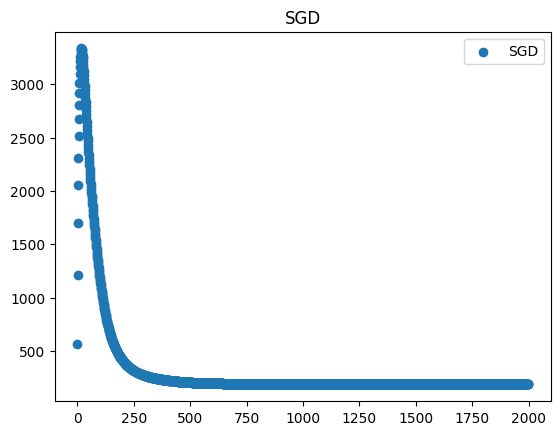

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_SGD)), loss_hist_SGD, label= 'SGD' )
plt.legend()
plt.title("SGD")

In [26]:
MF_ALS = MatrixFactor(k = 24, opt_method = 'ALS', learn_rt = 0.001, num_iter=2000, print_enabled=False)
U_ALS, VT_ALS, loss_hist_ALS = MF_ALS. fit(A_small)


print(U_ALS, "\nuser-feature matrix using ALS\n")
print(np.transpose(U_ALS), "\nitem-feature matrix using ALS")

rating_5 = U_ALS[4]
movieID_5 = rating_5.argsort()[::-1][:5]
print("\n5 highest rating")
for i in movieID_5:
    print("movieID: ", i)
    print("rating:" ,rating_5[i])

[[ 1.54898274 -0.44782759  0.30358306 ...  1.12200881  0.29509888
   2.16275215]
 [ 0.45074602  0.43412815  0.46393421 ...  0.72625647  0.70930204
   0.57014984]
 [ 0.06192884  0.05972393  0.06392801 ...  0.10013851  0.09765209
   0.07846059]
 ...
 [ 0.55992098  0.53799873  0.57641219 ...  0.90129395  0.87878446
   0.70703085]
 [ 0.50658203  0.47690412  0.5171539  ...  0.79669123  0.78673738
   0.62652433]
 [-2.33026362  0.6481023  -1.11210736 ... -0.20394972  0.43685584
  -0.11898803]] 
user-feature matrix using ALS

[[ 1.54898274  0.45074602  0.06192884 ...  0.55992098  0.50658203
  -2.33026362]
 [-0.44782759  0.43412815  0.05972393 ...  0.53799873  0.47690412
   0.6481023 ]
 [ 0.30358306  0.46393421  0.06392801 ...  0.57641219  0.5171539
  -1.11210736]
 ...
 [ 1.12200881  0.72625647  0.10013851 ...  0.90129395  0.79669123
  -0.20394972]
 [ 0.29509888  0.70930204  0.09765209 ...  0.87878446  0.78673738
   0.43685584]
 [ 2.16275215  0.57014984  0.07846059 ...  0.70703085  0.62652433
 

Text(0.5, 1.0, 'ALS')

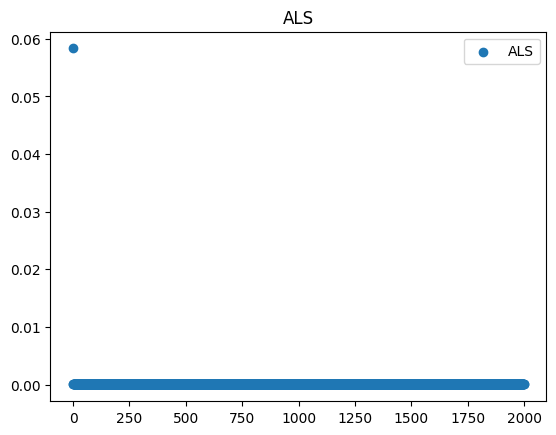

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(range(len(loss_hist_ALS)), loss_hist_ALS, label= 'ALS' )
plt.legend()
plt.title("ALS")

In [ ]:
pd.DataFrame(MF_ALS.U)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.747303,1.470681,0.069928,0.957176,0.627974,-0.169574,1.039599,1.559018,-0.174980,0.532936,...,1.196258,0.420941,0.634054,0.160901,0.324665,-0.166707,0.106781,-0.144716,0.997444,0.604329
1,0.385853,0.384147,0.534203,0.606036,0.274567,0.573423,0.322318,0.555336,0.646689,0.736927,...,0.513307,0.631875,0.370088,0.457133,0.549228,0.531755,0.570568,0.416875,0.400665,0.386445
2,0.052997,0.054645,0.075499,0.084406,0.040968,0.082895,0.043410,0.076835,0.092718,0.101752,...,0.070228,0.088689,0.046791,0.063413,0.072020,0.073094,0.079401,0.055247,0.056346,0.052706
3,0.513479,0.053275,-0.029232,1.310373,-0.290071,1.671448,0.799946,-0.418629,1.417542,0.282987,...,-0.869817,0.186711,0.496096,0.537397,-0.428753,0.951470,0.512990,0.311396,1.637701,-0.059850
4,-0.181347,1.227669,-0.162384,0.564311,-0.275554,1.246820,-0.031329,0.337545,0.947533,0.017983,...,0.108703,0.226458,1.155868,1.337623,1.966756,1.554457,0.274465,0.506361,1.152169,0.187118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.506166,0.502900,0.763391,0.820350,0.338129,0.770503,0.403527,0.795740,0.889434,1.013842,...,0.713069,0.917112,0.465972,0.635897,0.767731,0.749430,0.821828,0.588540,0.567350,0.525288
96,0.385853,0.384147,0.534203,0.606036,0.274567,0.573423,0.322318,0.555336,0.646689,0.736927,...,0.513307,0.631875,0.370088,0.457133,0.549228,0.531755,0.570568,0.416875,0.400665,0.386445
97,0.481164,0.469174,0.673476,0.750575,0.336010,0.710880,0.393678,0.684736,0.805423,0.911010,...,0.634857,0.785746,0.459481,0.570638,0.685780,0.661002,0.711773,0.521339,0.498889,0.481707
98,0.446338,0.444018,0.585975,0.670994,0.338010,0.637368,0.363729,0.624955,0.719202,0.816860,...,0.569955,0.671362,0.394975,0.500828,0.634655,0.583850,0.629102,0.425571,0.429608,0.416540


In [ ]:
pd.DataFrame(MF_ALS.VT)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.303060,0.257804,0.090207,0.159867,0.156877,0.356780,-0.037508,0.225322,0.125102,0.045178,...,0.105856,0.109772,0.125102,0.152211,0.039617,0.125102,0.110665,0.034844,0.118216,0.105986
1,0.594414,0.717893,0.693473,0.782196,0.665623,0.582848,0.588705,0.859819,0.764816,0.770433,...,0.775875,0.806068,0.764816,0.855942,0.727051,0.764816,0.716162,0.708194,0.825015,0.937855
2,0.485437,0.496053,0.460215,0.630436,0.565306,0.592496,0.351120,0.688063,0.557258,0.932629,...,0.573131,0.530002,0.557258,0.480464,0.674968,0.557258,0.598225,0.572142,0.578477,0.563988
3,0.010356,-0.247696,0.000022,-0.184549,-0.068772,-0.190045,-0.045853,-0.248691,-0.095563,-0.389922,...,-0.091773,-0.128002,-0.095563,-0.118548,-0.072212,-0.095563,-0.083240,-0.057790,-0.165084,-0.230650
4,0.545899,0.325300,0.241765,0.485141,0.252618,0.580718,0.344605,0.485323,0.437059,0.613153,...,0.461167,0.467961,0.437059,0.373785,0.395045,0.437059,0.470809,0.394468,0.509624,0.436963
5,0.606914,0.630374,0.632659,0.696467,0.725331,0.668893,0.561804,0.642160,0.598813,0.834857,...,0.619882,0.601886,0.598813,0.666876,0.587536,0.598813,0.562505,0.428234,0.566856,0.624220
6,0.168479,-0.056299,0.148860,0.049522,0.179479,0.257407,0.048507,-0.030311,0.066438,0.018674,...,0.047428,0.084333,0.066438,0.045390,0.083873,0.066438,0.077664,0.184624,0.049539,-0.004624
7,-0.333760,-0.420248,-0.528162,-0.508150,-0.602986,-0.521390,-0.461422,-0.554111,-0.483130,-0.273465,...,-0.487021,-0.450379,-0.483130,-0.492516,-0.520000,-0.483130,-0.478151,-0.376965,-0.436272,-0.367712
8,1.157798,1.151677,1.235881,1.100889,1.251081,1.276528,1.391084,0.976732,1.135089,0.998950,...,1.122103,1.079756,1.135089,1.149079,1.116764,1.135089,1.127501,1.172262,1.128304,1.025575
9,0.717164,0.552702,0.586170,0.531936,0.693768,0.661957,0.709455,0.405359,0.559091,0.191200,...,0.558133,0.546522,0.559091,0.672511,0.565036,0.559091,0.498659,0.530782,0.545975,0.543948
